# Import Libraries #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Import online dataset

from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data

In [28]:
# input variables ya features
digits.data.shape
y = digits.target
# means 1797 pictures size 64 = 8*8

In [29]:
# Output labels
digits.target.shape

(1797,)

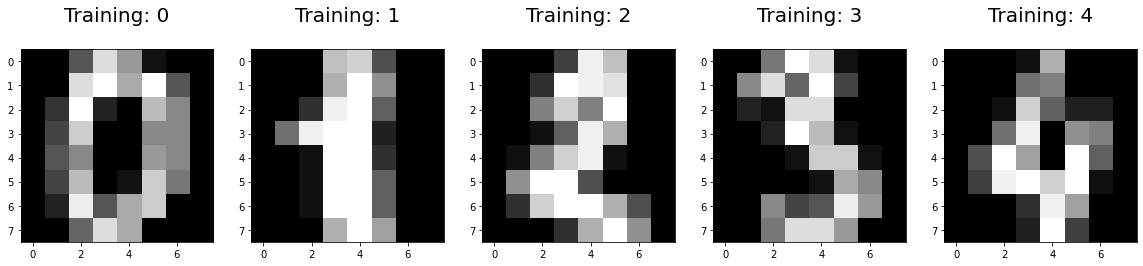

In [30]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title("Training: %i\n" % label, fontsize = 20)

In [31]:
# help(plt)

In [32]:
# Split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [33]:
print("Train input data: ",x_train.shape)
print("Test input data: ", x_test.shape)
print("Train output data: ",y_train.shape)
print("Test output data: ",y_test.shape)

Train input data:  (1347, 64)
Test input data:  (450, 64)
Train output data:  (1347,)
Test output data:  (450,)


# Model Training #

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)
model

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.predict(x_test[0:10])
predictions = model.predict(x_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 9, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [36]:
# accuracy test
score = model.score(x_test, y_test)
print("The accuracy of the model is: ", score)

The accuracy of the model is:  0.9511111111111111


In [37]:
# Confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

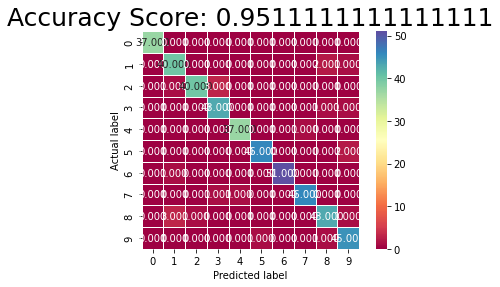

In [38]:
import seaborn as sns
plt.Figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Spectral');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size = 25);

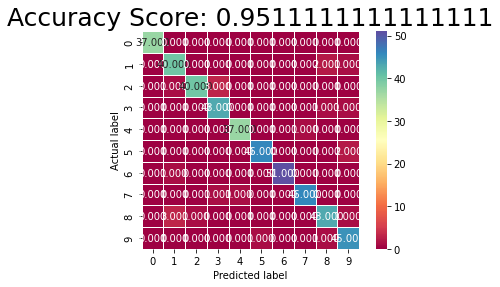

In [39]:
import seaborn as sns
plt.Figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Spectral');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size = 25);

In [40]:
# Getting misclassified labels

import numpy as np
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
 if label != predict:
  misclassifiedIndexes.append(index)
  index +=1

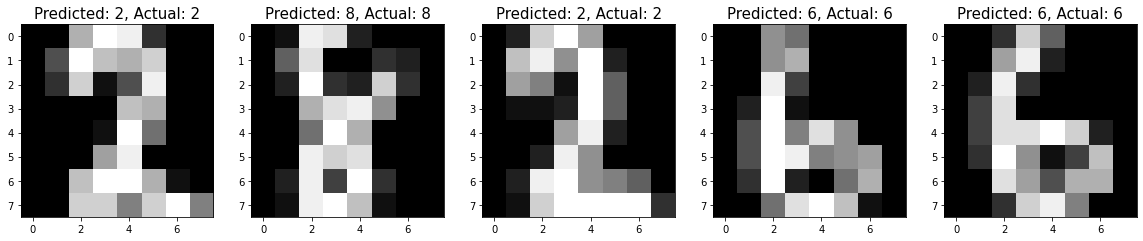

In [41]:
# Plotting the misclassified labels with known values 
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 15)